<a href="https://colab.research.google.com/github/harishahamed26/PredictionOfHeartRate/blob/main/HeartRatePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

In [ ]:
df_HeartRate = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/PredictionOfHeartRate/main/PT_Train.csv')
df_HeartRate.head(5)

,Timestamp (GMT),Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
0,17/08/2015 15:09,139,41,NaN,NaN
1,17/08/2015 15:10,144,40,92.0,140.0
2,17/08/2015 15:11,140,42,89.0,144.0
3,17/08/2015 15:12,138,45,93.0,141.0
4,17/08/2015 15:13,133,42,94.0,134.0


In [ ]:
df_HeartRate = df_HeartRate.drop(['Lifetouch Respiration Rate', 'Oximeter SpO2',
       'Oximeter Pulse'], axis = 1)

In [ ]:
df_HeartRate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Timestamp (GMT)             226 non-null    object 
 1   Lifetouch Heart Rate        226 non-null    int64  
 2   Lifetouch Respiration Rate  226 non-null    int64  
 3   Oximeter SpO2               191 non-null    float64
 4   Oximeter Pulse              191 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.0+ KB


In [ ]:
df_HeartRate.isna().sum()

Timestamp (GMT)                0
Lifetouch Heart Rate           0
Lifetouch Respiration Rate     0
Oximeter SpO2                 35
Oximeter Pulse                35
dtype: int64

In [ ]:
df_HeartRate.describe()

,Lifetouch Heart Rate,Lifetouch Respiration Rate,Oximeter SpO2,Oximeter Pulse
count,226.000000,226.000000,226.000000,226.000000
mean,2315.615044,2219.216814,78.845133,78.845133
std,11351.588825,11370.093548,34.865429,34.865429
min,106.000000,34.000000,-1.000000,-1.000000
25%,136.000000,38.000000,92.000000,92.000000
50%,145.000000,46.000000,93.000000,93.000000
75%,156.000000,53.000000,95.000000,95.000000
max,61442.000000,61442.000000,98.000000,98.000000


In [ ]:
df_HeartRate['Timestamp (GMT)'] = df_HeartRate['Timestamp (GMT)'].replace({'/' : '-'} , regex=True)
df_HeartRate['Timestamp (GMT)'] 

0      17-08-2015 15:09
1      17-08-2015 15:10
2      17-08-2015 15:11
3      17-08-2015 15:12
4      17-08-2015 15:13
             ...       
221    17-08-2015 18:50
222    17-08-2015 18:51
223    17-08-2015 18:52
224    17-08-2015 18:53
225    17-08-2015 18:54
Name: Timestamp (GMT), Length: 226, dtype: object

In [ ]:
Step_Count = list(range(0, len(df_HeartRate)))


In [ ]:
def Plot_TimeSeries(x,y):  
    plt.figure(figsize=(10,10))
    plt.plot(x ,y , color = 'Red')
    plt.title("Line Graph for 'Lifetouch Heart Rate' and 'Step Count' ")
    plt.xlabel('Lifetouch Heart Rate')
    plt.ylabel('Step Count')
    plt.show()


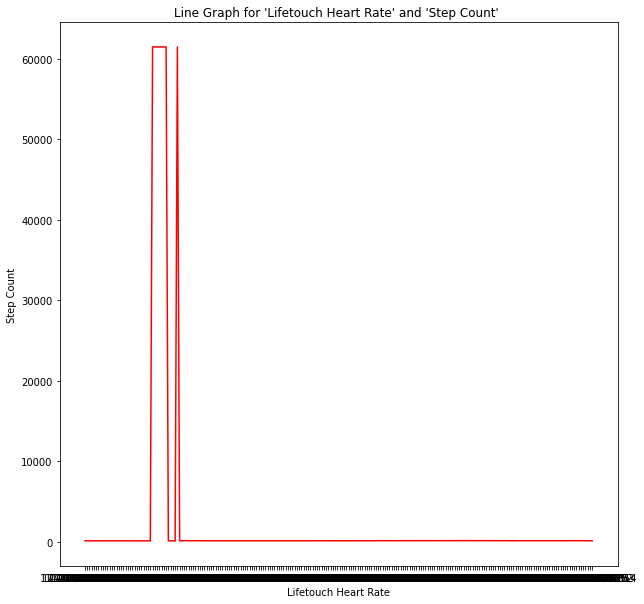

In [ ]:
x = df_HeartRate['Timestamp (GMT)']
y = df_HeartRate['Lifetouch Heart Rate']
Plot_TimeSeries(x,y)

In [ ]:
def Check_Stationary(series):
    statistic, p_value, n_lags, critical_values = sm.tsa.stattools.kpss(series)
    print(f'p value : {p_value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary \n')



In [ ]:
Check_Stationary(df_HeartRate['Lifetouch Heart Rate'])

p value : 0.1
Result: The series is stationary 



In [ ]:
import numpy as np
df_HeartRate['Lifetouch Heart Rate'] = np.where(df_HeartRate['Lifetouch Heart Rate']>200,np.nan,df_HeartRate['Lifetouch Heart Rate'])


In [ ]:
df_HeartRate['Lifetouch Heart Rate']= df_HeartRate['Lifetouch Heart Rate'].ffill()


In [ ]:
df_HeartRate.info()

In [ ]:
df =[]
df['Lifetouch Heart Rate'] = df_HeartRate['Lifetouch Heart Rate'].astype(np.int64)

TypeError: ignored

In [ ]:
#Determine rolling statistics

df["rolling_avg"] = df_HeartRate['Lifetouch Heart Rate'].rolling(window=60).astype(int).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
df["rolling_std"] = df_HeartRate['Lifetouch Heart Rate'].rolling(window=60).std()


AttributeError: ignored

In [ ]:
# Convert the month column to a datetime object
df_HeartRate['Timestamp (GMT)'] = pd.to_datetime(df_HeartRate['Timestamp (GMT)'])

# Set the month column as the index
df_HeartRate.set_index('Timestamp (GMT)', inplace=True)

In [ ]:
#here I have done forecasting with ARMA model
# Import the necessary libraries
from statsmodels.tsa.arima_model import ARMA


# Split the data into training and testing sets
train = df_HeartRate[:'2015-08-17 18:54:00']
test = df_HeartRate['2015-08-17 18:55:00':]

# Fit the ARMA model
model = ARMA(train, order=(10,1,10))
model_fit = model.fit()


In [ ]:
# Predict the next quarter of 1961
predictions = model_fit.predict(start='2015-08-17 18:54:00', end='2015-08-17 19:15:00')
predictions

2015-08-17 18:54:00    142.611549
2015-08-17 18:55:00    140.209599
2015-08-17 18:56:00    143.417149
2015-08-17 18:57:00    143.674168
2015-08-17 18:58:00    144.169291
2015-08-17 18:59:00    143.287240
2015-08-17 19:00:00    143.159399
2015-08-17 19:01:00    143.055546
2015-08-17 19:02:00    142.745669
2015-08-17 19:03:00    143.187708
2015-08-17 19:04:00    143.128547
2015-08-17 19:05:00    143.211330
2015-08-17 19:06:00    143.307619
2015-08-17 19:07:00    143.249432
2015-08-17 19:08:00    143.331873
2015-08-17 19:09:00    143.293377
2015-08-17 19:10:00    143.336792
2015-08-17 19:11:00    143.374416
2015-08-17 19:12:00    143.368688
2015-08-17 19:13:00    143.421998
2015-08-17 19:14:00    143.428577
2015-08-17 19:15:00    143.452918
Freq: T, dtype: float64

In [ ]:
Pred_HR = predictions.reset_index(drop=True).values
Pred_HR_StepCount = list(range(max(Step_Count), max(Step_Count)+len(predictions)))  


In [ ]:
Actual_HR =df_HeartRate.reset_index(drop=True).values

In [ ]:
df_HeartRate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 226 entries, 2015-08-17 15:09:00 to 2015-08-17 18:54:00
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lifetouch Heart Rate  226 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


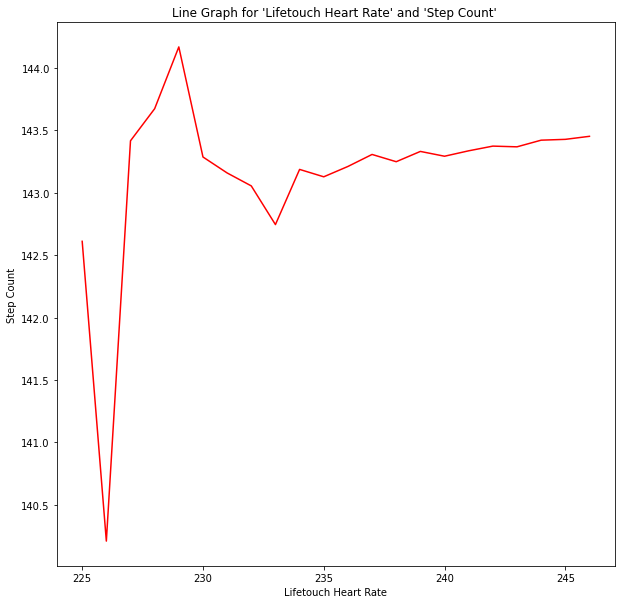

In [ ]:

Plot_TimeSeries(Pred_HR_StepCount, Pred_HR)

In [ ]:
df_HeartRate[:-1]

,Lifetouch Heart Rate
Timestamp (GMT),
2015-08-17 15:09:00,139.0
2015-08-17 15:10:00,144.0
2015-08-17 15:11:00,140.0
2015-08-17 15:12:00,138.0
2015-08-17 15:13:00,133.0
...,...
2015-08-17 18:49:00,157.0
2015-08-17 18:50:00,159.0
2015-08-17 18:51:00,151.0


IndexError: ignored

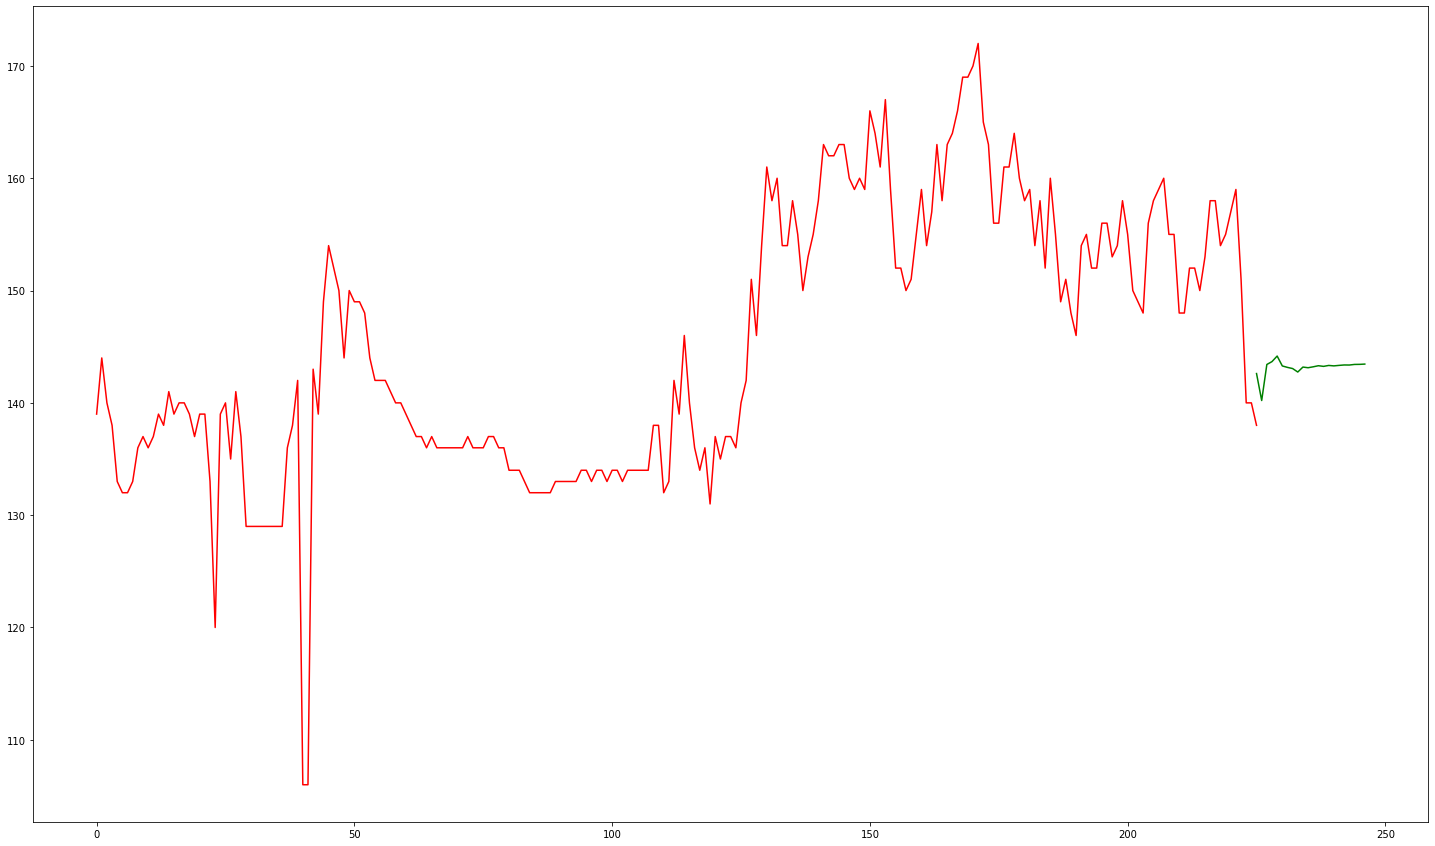

In [ ]:
plt.figure(figsize=(25,15))
plt.plot(Step_Count, Actual_HR,color = 'Red', label = 'Actual Heart Rate')
plt.plot(Pred_HR_StepCount, Pred_HR, color = 'Green', label = 'Predicted Heart Rate')
plt.ylim = (0, max(Step_Count1))
plt.fill_between(139.0, 142.611549, 0, color ='blue')
plt.title(" Heart Rate ")
plt.xlabel('Lifetouch Heart Rate')
plt.ylabel('Rates')
plt.legend()
plt.show()

In [ ]:
# Obtain the AIC and BIC
print('AIC: ', model_fit.aic)
print('BIC: ', model_fit.bic)

AIC:  1374.0845229371735
BIC:  1387.7666629342625
